## Network architecture


|Layer | Size|
|---- |---- |
| Input| 784|
| Hidden| 100|
| Output| 10|


In [1]:
import matplotlib.pyplot as plt

In [16]:
import kipr as kp
import numpy as np

with np.load("C:/Users/kipr/Downloads/mnist.npz") as data:
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

nb_examples = len(train_labels)

train = kp.arr((train_examples.reshape(-1, 28*28, 1)/255).astype(np.float32))

train_oh = np.zeros((nb_examples, 10))
np.put_along_axis(train_oh, train_labels.reshape(-1, 1), 1, 1)
labels = kp.arr(train_oh.astype(np.float32)).reshape([nb_examples, 10, 1])

drelu = lambda x: kp.relu(x) / (kp.relu(x) + kp.arr(0.000000000001))

epochs = 5
batch_size = 32
learning_rate = kp.arr(0.01)

W1 = kp.arr('random', shape=[100, 784]) - kp.arr(0.5)
b = kp.arr('random', shape=[100, 1]) - kp.arr(0.5)
W2 = kp.arr('random', shape=[10, 100]) - kp.arr(0.5)

# h = W1 @ train[:batch_size] + b
# W2 @ kp.relu(h)


Let $l$ be an integer in range $\{0, ..., L\}$ where $L$ is the number of layers in the network.

$$o_l = act(W_l \times o_{l-1} + b_l)$$
$$2L = (o_L - y_{true})^2$$
$$\frac{\partial L}{\partial o_L} = (o_L - y_{true})$$
$$\frac{\partial L}{\partial W_L} = \frac{\partial L}{\partial o_L} \frac{\partial o_L}{\partial W_L} = (o_L - y_{true}) \cdot o_{L-1}$$


$s_1 = W_1 \times x_{batch} \rightarrow (l_{batch}, 100, 1) = (100, 784) \times (l_{batch}, 784, 1)$

$s_2 = s_1 + b \rightarrow (l_{batch}, 100, 1) = (l_{batch}, 100, 1) + (100, 1)$

$s_3 = ReLU(s_2) \rightarrow (l_{batch}, 100, 1)$

$s_4 = W_2 \times s_3 \rightarrow (l_{batch}, 10, 1) = (10, 100) \times (l_{batch}, 100, 1) $

$L = (s_4 - y) \rightarrow (l_{batch}, 10, 1)$

$RMSE = L^2 \rightarrow (1)$


In [18]:
rmses = []

for k in range(epochs):
    for batch in range(nb_examples // batch_size):
        x_batch = train[batch*32 : (batch+1)*32]
        y_batch = labels[batch*32 : (batch+1)*32]

        s1 = W1 @ x_batch
        s2 = s1 + b
        s3 = kp.relu(s2)
        s4 = W2 @ s3
        loss = (s4  - y_batch)
        rmse = (loss * loss) / kp.arr(2)
        rmses.append(rmse.mean())
        print(rmse.mean())

        dW2 = loss @ s3.reshape([32, 1, 100])
        
        r1 = loss.reshape([32, 1, 10]) @ W2
        r2 = r1.reshape([32, 100, 1]) * drelu(s2)

        db = r2

        dW1 = r2 @ x_batch.reshape([32, 1, 784]) 

        W1 += learning_rate * dW1.mean(0)
        b += learning_rate * b.mean(0)
        W2 += learning_rate * dW2.mean(0)




kipr.arr([ 10.49067],
         shape=[ 1])
kipr.arr([ 57.75942],
         shape=[ 1])
kipr.arr([ 4789.87500],
         shape=[ 1])
kipr.arr([ 690706688.00000],
         shape=[ 1])
kipr.arr([ 1512921964996275323535360.00000],
         shape=[ 1])
kipr.arr([ in],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
         shape=[ 1])
kipr.arr([ -nan(ind],
      

KeyboardInterrupt: 

0.3887875

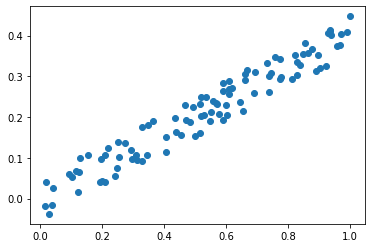

In [13]:
x = kp.arr('random', shape=[100])
y = kp.arr(0.4) * x + (kp.arr('random', shape=[100])-kp.arr(0.5)) * kp.arr(0.1) + 

plt.scatter(x.numpy(), y.numpy())

(y / x).numpy().mean()


In [6]:
a = kp.arr('random', shape=[3, 4]) - kp.arr(0.5)

drelu = lambda x: kp.relu(x) / (kp.relu(x) + kp.arr(0.000000000001))
kp.relu(a), 

(kipr.arr([[ 0.025429, 0.000000, 0.000000, 0.48248],
           [ 0.360193, 0.076020, 0.311063, 0.00000],
           [ 0.139960, 0.129520, 0.301791, 0.00000]],
          shape=[ 3, 4]),
 kipr.arr([[ 1.000000, 0.000000, 0.000000, 1.00000],
           [ 1.000000, 1.000000, 1.000000, 0.00000],
           [ 1.000000, 1.000000, 1.000000, 0.00000]],
          shape=[ 3, 4]))